
<img src="https://user-images.githubusercontent.com/7065401/55025843-7d99a280-4fe0-11e9-938a-4879d95c4130.png"
    style="width:150px; float: right; margin: 0 40px 40px 40px;"></img>

<!-- <img src="https://scontent.ftun15-1.fna.fbcdn.net/v/t39.30808-6/311004579_479229304250165_9026324343313302553_n.png?_nc_cat=109&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RW7tL5PHPcIAX9bZ7lp&_nc_ht=scontent.ftun15-1.fna&oh=00_AfB8mMPGwpjTQwlySZkZJ_9dlXOjjsjJ5E39VDPOwIEeuQ&oe=654F55AB" width="100" height="100" style="float: left; margin-right: 10px;" > -->
    
#   <div style="text-align: center;"> Méthodes de Monte Carlo (2023-2024)  </div>
#   <div style="text-align: center;">TP4: Mouvement Brownien, Monte Carlo et Applications
  </div>     

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##  Partie 1: Simulation d'un mouvement brownien

On veut appliquer le modèle de Black-Scholes qui est un exemple classique en finance qui utilise le mouvement brownien. Il s'agit d'un modèle d'évaluation d'options financières qui utilise les propriétés du mouvement brownien pour modéliser les fluctuations de prix d'un actif financier.


##### Rappel du cours (Proposition):

Soit $(t_n)_{n\in \mathbb{N}} $ une suite de $\mathbb{R}_+$ et  $(Z_n)_{n\in \mathbb{N}} $ une suite de variables i.i.d de loi $\mathcal{N}(0,1)$. On définit le processus ${W}=(W_t)_{t \in \mathbb{R}_+} $ par: $W_0=0$ et $W_{t_{n+1}}= W_{t_n} + \sqrt{t_{n+1}-t_n } Z_n    $.

Alors $W$ est une réalisation de trajectoires du mouvement brownien aux instants $(t_n)_{n\in \mathbb{N}} $ .




1- En utilisant que les accroissements d’un mouvement brownien $(W_t)_{0\leq t \leq 1}$ sont indépendants et stationnaires simuler une réalisation du mouvement brownien.




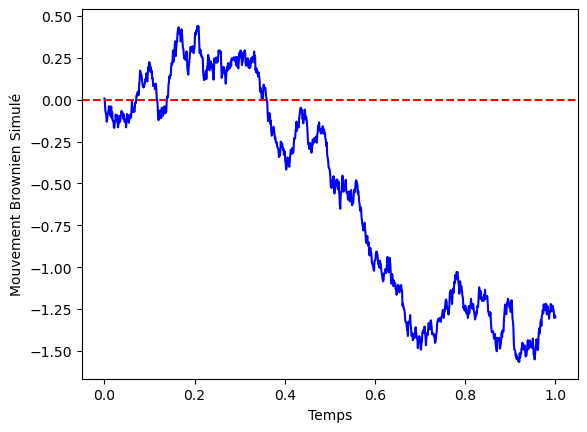

In [ ]:
# Question 1: Simulation d'un mouvement brownien

np.random.seed(34)

# Paramètres
n = 1000
t = 1
t_seq = np.linspace(0, t, n+1)  # n+1 parce que le brownien commence à 0

# Changement dans le temps (tn+1 - tn)
dt = t / n

# Simulation du mouvement brownien
Z_n = np.cumsum(np.random.normal(0, 1, n+1))
W_t = np.sqrt(dt) * Z_n

# Plot du mouvement brownien simulé
plt.plot(t_seq, W_t, color='blue')
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Temps')
plt.ylabel('Mouvement Brownien Simulé')
plt.show()




2- Écrire une fonction qui permet de simuler un vecteur gaussien (clin d'oeil sur le TP3).


In [ ]:

# Question 2: Simulation d'un vecteur gaussien

from numpy.linalg import cholesky

def cholesky_simulation(n, mu, sigma):
    z = np.random.normal(size=(n, len(mu)))
    L = np.linalg.cholesky(sigma).T
    mu = mu.reshape(-1, 1)
    x =mu +  L.dot(z.T)
    return x.T


# Paramètres
sigma_matrix = np.array([[4, 3], [3, 9]])
mu_vector = np.array([1, 2])

# Simulation du vecteur gaussien
cholesky_simulation_result = cholesky_simulation(100, mu_vector, sigma_matrix)


###### Estimation avec la méthode Monte-Carlo

On considère un estimateur de la forme $\hat{\delta} = \frac{1}{n} \sum^n_{k=1} y_k$, avec $n$ la taille de l'échantillon et $y=(y_1, ..., y_n)$.

Écrire une fonction **MC.estim(y, level)** qui retourne $\hat{\delta}$ ainsi que l'intervalle de confiance *level* associé.

In [ ]:
def MC_estim(y, level=0.95):
    delta = np.mean(y)
    s2 = np.var(y) / (len(y)-1)  # Variance empirique
    e_delta = np.percentile(np.random.normal(0, 1, 10000), 100 * (1 + level) / 2) * np.sqrt(s2)

    # Retourne un DataFrame avec les valeurs demandées
    return {'value': delta, 'var': s2, 'IC.inf': delta - e_delta, 'IC.sup': delta + e_delta, 'level': level}



## Partie 3: Estimation des prix des options financière avec le modèle de Black-scholes

Soient $(W_t^{(1)})$ et $(W_t^{(1)})$ deux mouvements browniens avec corrélation $\rho= \frac{1}{2}$, *i.e.* $W=(W_t^{(1)}, W_t^{(2)}))$ suit la loi $\mathcal{N}(0,\Sigma)$ avec

 $$ \Sigma=  \begin{pmatrix}
         1& \rho \\ \rho & 1
   \end{pmatrix} $$

On souhaite calculer  
$\mathcal{S}=\mathbb{E}\left[ \left( \frac{1}{2} e^{-v^2/2+v W^{(1)}}+ \frac{1}{2} e^{ -v^2/2+v W^{(2)} }-1     \right) \mathbb{1}_{ \{ \frac{1}{2} e^{-v^2/2+v W^{(1)}}+ \frac{1}{2} e^{ -v^2/2+v W^{(2)}} -1    \geq 0   \}} \right] $, avec v=1 et $\mathcal{S}$ est une forme simplifiée de l'équation du modèle de Black-Scholes.



Estimer $\mathcal{S}$ par la méthode Monte-Carlo.





In [ ]:
# Modèle de black-scholes

# 1/ Simulation de W
sigma_matrix_bs = np.array([[1, 0.5], [0.5, 1]])
mu_vector_bs = np.array([0, 0])
W_bs = cholesky_simulation(100, mu_vector_bs, sigma_matrix_bs)

# 2/ Fonction S
def S(W, v):
    y = 0.5 * np.exp(-0.5 * v**2) * np.sum(np.exp(v * W), axis=1) - 1
    return np.maximum(y, 0)

# 3/ Estimation avec MC.estim
S_hat = MC_estim(S(W_bs, 1))
print("Estimation de S:", S_hat['value'])
print("Intervalle de confiance:", S_hat['IC.inf'], S_hat['IC.sup'])


Estimation de S: 0.3010920372646142
Intervalle de confiance: 0.11849152261431156 0.48369255191491684
